In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [18]:
dataset = pd.read_csv("/Users/Andrew/Desktop/python-dev/loan-predictive-model/data/loan_predictive_model_data.csv")

In [4]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
dataset['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

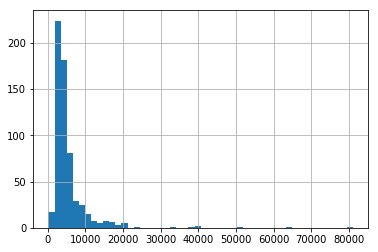

In [7]:
dataset['ApplicantIncome'].hist(bins=50)

In [8]:
list(dataset)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

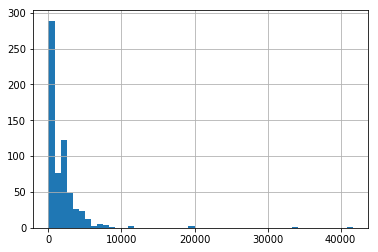

In [9]:
dataset['CoapplicantIncome'].hist(bins=50)

/Users/Andrew/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


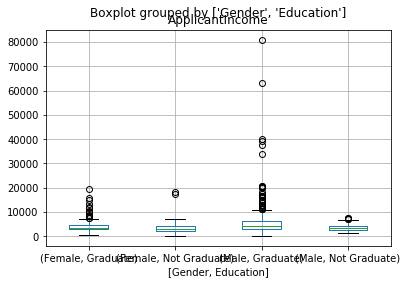

In [10]:
dataset.boxplot(column='ApplicantIncome', by=['Gender','Education'])

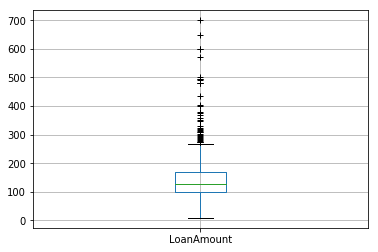

In [11]:
dataset.boxplot(column='LoanAmount', sym='+')

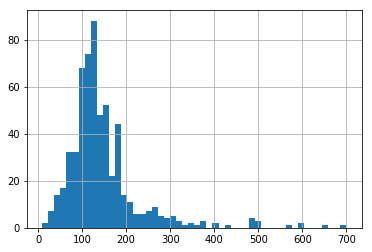

In [12]:
dataset['LoanAmount'].hist(bins=50)

In [46]:
credit_history_table = dataset['Credit_History'].value_counts(ascending=True)
print('Basic frequency table showing Credit History:')
print(credit_history_table)

Basic frequency table showing Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [47]:
loan_probability_table = dataset.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [15]:
print('Basic frequency table showing probability of securing a loan:')
print(loan_probability_table)

Basic frequency table showing probability of securing a loan:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Applicants by Credit_History Value')

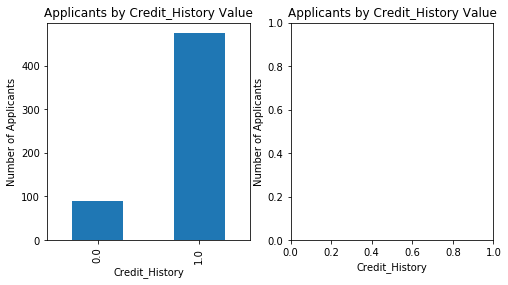

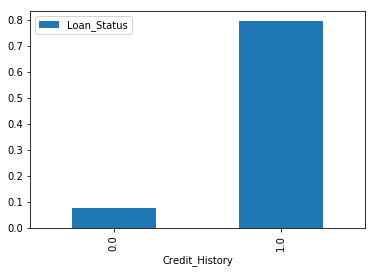

In [45]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Number of Applicants')
ax1.set_title("Applicants by Credit_History Value")
credit_history_table.plot(kind='bar')

ax2 = fig.add_subplot(122)
loan_probability_table.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Number of Applicants')
ax2.set_title("Applicants by Credit_History Value")